# ANOVA: Hypothesis testing with Python

## **Introduction**


In this activity, we are a data professional working with **historical marketing promotion data**. We will use the data to run a **one-way ANOVA** and a **post hoc ANOVA test**. Then, we will communicate our results to stakeholders. 

Each data row corresponds to an independent marketing promotion, where our business uses TV, social media, radio, and influencer promotions to increase sales. Stakeholders want to know if sales are significantly different among various TV and influencer promotion types.

To address this request, a **one-way ANOVA** test will enable us to determine if there is a statistically significant difference in sales among groups. This includes:
* Using plots and descriptive statistics to select a categorical independent variable
* Creating and fitting a linear regression model with the selected categorical independent variable
* Checking model assumptions
* Performing and interpreting a one-way ANOVA test
* Comparing pairs of groups using an ANOVA post hoc test
* Interpreting model outputs and communicating the results to nontechnical stakeholders

## **1. Import packages** 


In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
data = pd.read_csv('marketing_sales_data.csv')

data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


The features in the data are:
* TV promotion budget (in Low, Medium, and High categories)
* Social media promotion budget (in millions of dollars)
* Radio promotion budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in Mega, Macro, Nano, and Micro categories)

## **2. Data exploration** 


First, let's use a boxplot to determine how `Sales` vary based on the `TV` promotion budget category.

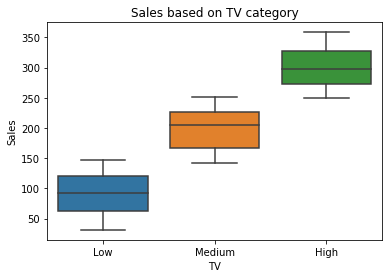

In [3]:
fig = sns.boxplot(x=data.TV,
                  y=data.Sales)
fig.set_title('Sales based on TV category')
plt.show();

**Question:** Is there variation in `Sales` based off the `TV` promotion budget?

> *There is considerable variation in `Sales` across the `TV` groups. The significance of these differences can be tested with a one-way ANOVA.*

Now, use a boxplot to determine how `Sales` vary based on the `Influencer` size category.

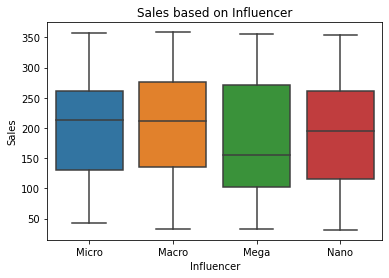

In [4]:
fig = sns.boxplot(x=data.Influencer,
                  y=data.Sales)
fig.set_title('Sales based on Influencer')
plt.show();

**Question:** Is there variation in `Sales` based off the `Influencer` size?

> *Yes, but may not be significance.*

### Remove missing data

Confirm the data contains no missing values.

In [5]:
data.dropna(inplace=True)

data.isna().sum()

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

## **3. Model building** 


Fit a linear regression model that predicts `Sales` using one of the independent categorical variables in `data`.

In [6]:
ols_formula = 'Sales ~ C(TV)'

ols_model = ols(formula=ols_formula,
                data=data)

model = ols_model.fit()

result = model.summary()
result

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Mon, 06 Nov 2023   Prob (F-statistic):          8.81e-256
Time:                        15:36:20   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    124.360      0.000     295.783     305.276
C(TV)[T.Low]     -208.8133      3.329    -62.720      0.000    -215.353    -202.274
C(TV)[T.Medium]  -101.5061      3.325    -30.526      0.000    -108.038     -94.975
==============================================================================
Omnibus:                      450.714   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.763
Skew:                          -0.044   Prob(JB):                     1.71e-08
Kurtosis:                       1.775   Cond. No.                         3.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** Which categorical variable choosen for the model? Why?

> *We selected `TV` because it showed a strong relationship between `TV` category and average `Sales`.*

The independent observation assumption states that each observation in the dataset is independent. As each marketing promotion (row) is independent from one another, the independence assumption is not violated.

Next, verify that the normality assumption is upheld for the model.

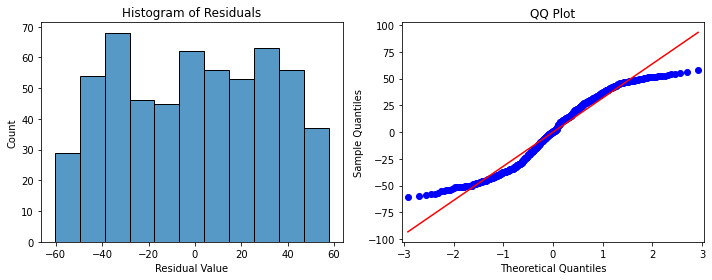

In [7]:
residuals = model.resid

fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.histplot(residuals, 
             ax=axes[0])

sm.qqplot(residuals,
          line='s',
          ax=axes[1])

axes[0].set_title('Histogram of Residuals')
axes[0].set_xlabel('Residual Value')

axes[1].set_title('QQ Plot')
axes[1].set_xlabel('Theoretical Quantiles')

plt.tight_layout()
plt.show();

**Question:** Is the normality assumption met?

> * *There is a reasonable concern that the normality is not met*
> * *The Normal QQ Plot forms an 'S' that deviates off the red diagonal line, which is not a desired behavior, but since `TV` is the most appropriate feature here, let's continue the lab*

Now, verify the constant variance (homoscedasticity) assumption is met for this model.

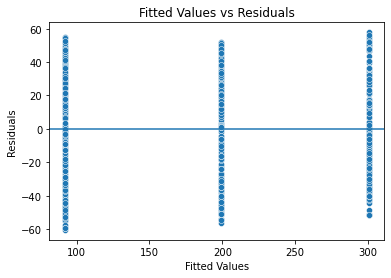

In [8]:
fig = sns.scatterplot(x=model.fittedvalues,
                      y=model.resid)

fig.set_title("Fitted Values vs Residuals")
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
fig.axhline(0)

plt.show();

**Question:** Is the constant variance (homoscedasticity) assumption met?

> *The variance where there are fitted values is similarly distributed, validating that the constant variance assumption is met.*

## **4. Results and evaluation** 

First, display the OLS regression results.

In [9]:
result

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Mon, 06 Nov 2023   Prob (F-statistic):          8.81e-256
Time:                        15:36:20   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    124.360      0.000     295.783     305.276
C(TV)[T.Low]     -208.8133      3.329    -62.720      0.000    -215.353    -202.274
C(TV)[T.Medium]  -101.5061      3.325    -30.526      0.000    -108.038     -94.975
==============================================================================
Omnibus:                      450.714   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.763
Skew:                          -0.044   Prob(JB):                     1.71e-08
Kurtosis:                       1.775   Cond. No.                         3.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** What is the interpretation of the model's R-squared?

> *The model with **$R^{2} = 0.874$** explains **$87.4\%$** of variation in `Sales` by using `TV` as the independent variable. This makes the model an effective predictor of `Sales`.*

**Question:** What is our intepretation of the coefficient estimates? Are the coefficients statistically significant?

> *The default `TV` promotion budget category is `High`, because it does not apprear in the table. According to the model, `Sales` with `Medium` TV promotion budget are lower on average than `Sales` with `High` TV promotion budget.<br><br>Example, the model predicts a `Low` TV promotion budget would be 208.813 (in million dollars) lower in `Sales` on avg than a `High` one.<br><br>
The p-value for all coefficients is 0.000 meaning all coeff are **statistically significance**. For example, there is a chance $95\%$ that the interval $[-215.353, -202.274]$ contains the true parameter of the slope of $\beta_{TVLow}$*

**Question:** Could the model be improved? Why or why not? How?

> *The model could be improved with a more granular view of the `TV` promotions. Additional variables, such as location of marketing campaign or the time of year, may increase model accuracy.*

### Perform a one-way ANOVA test

With the model fit, run a one-way ANOVA test to determine whether there is a statistically significant difference in `Sales` among groups. 

In [10]:
sm.stats.anova_lm(model,
                  typ=2)

,sum_sq,df,F,PR(>F)
C(TV),4.052692e+06,2.0,1971.455737,8.805550e-256
Residual,5.817589e+05,566.0,NaN,NaN


**Question:** What are the null and alternative hypotheses for the ANOVA test?

> * The null hypothesis is that there is NO difference in `Sales` based on the `TV` promotion budget. 
* The alternative hypothesis is that there is a difference in `Sales` based on the `TV` promotion budget.

**Question:** What is the conclusion from the one-way ANOVA test?

> * The F-test statistic is `1971.455737` and p-value $8.81 x 10^{-256}$.
* Because the p-value is less than our significance level `0.05`, we would reject the null hypothesis.

**Question:** What did the ANOVA test tell?

> It indicates that we can *reject the null hypothesis* in favor of the alternative hypothesis. There is a statistically significant difference in `Sales` among `TV` groups.

### Perform an ANOVA post hoc test

If we have significant results from the one-way ANOVA test, we can apply ANOVA post hoc tests such as the Tukey’s HSD post hoc test. 

Run the Tukey’s HSD post hoc test to compare if there is a significant difference between each pair of categories for TV.

In [11]:
tukey = pairwise_tukeyhsd(endog=data.Sales,
                          groups=data.TV)

tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
High,Low,-208.8133,0.001,-216.637,-200.9896,True
High,Medium,-101.5061,0.001,-109.3204,-93.6918,True
Low,Medium,107.3072,0.001,99.7063,114.908,True


**Question:** What is the interpretation of the Tukey HSD test?

> *The first row compares the `High` and `Low` TV groups, which indicates that we can reject the null hypothesis.<br><br>
We can also reject the null hypothesis for the other two comparisons.*

**Question:** What did the post hoc tell?

> *It was conducted to determine which `TV` groups are different and how many are different from each other. This provides more detail than the one-way ANOVA results, which can at most determine that at least one group is different.Further, using the Tukey HSD controls for the increasing probability of incorrectly rejecting a null hypothesis from peforming multiple tests. 
<br><br>
The results were that `Sales` is not the same between any pair of `TV` groups.*

## **Considerations**

**Some key takeaways we have learned**

* One-way ANOVA can be used to determine if there are significant differences among the means of three or more groups.
* ANOVA post hoc tests provide a more detailed view of the pairwise differences between groups.

**Summary to provide to stakeholders**

* High TV promotion budgets result in significantly more sales than both medium and low TV promotion budgets. Medium TV promotion budgets result in significantly more sales than low TV promotion budgets.

Specifically, following are estimates for the difference between the mean sales resulting from different pairs of TV promotions, as determined by the Tukey's HSD test:

* Estimated difference between the mean sales resulting from `High` and `Low` TV promotions: **\\$208.81 million (with 95% confidence that the exact value for this difference is between 200.99 and 216.64 million dollars)**. 
* Estimated difference between the mean sales resulting from `High` and `Medium` TV promotions: **\\$101.51 million (with 95% confidence that the exact value for this difference is between 93.69 and 109.32 million dollars)**.
* difference between the mean sales resulting from `Medium` and `Low` TV promotions: **\\$107.31 million (with 95\% confidence that the exact value for this difference is between 99.71 and 114.91 million dollars)**.

The linear regression model estimating `Sales` from `TV` had an R-squared of $0.8714$, making it a fairly accurate estimator. The model showed a statistically significant relationship between the `TV` promotion budget and `Sales`. 

The difference in the distribution of sales across TV promotions was determined significant by both a one-way ANOVA test and a Tukey’s HSD test. 

#### **Reference**
[Saragih, H.S. *Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data)